<a href="https://colab.research.google.com/github/leobioinf0/Statistics/blob/main/S07_T01_Tasca_dades_probabilitats_i_estad%C3%ADstiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nivell 1





## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
import numpy as np
import random
from imblearn.over_sampling import SMOTE

In [93]:
import pandas as pd

df = pd.read_csv('/content/athlete_events.csv', encoding='utf8')
df = df[['Sex', 'Height', 'Weight']]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,Height,Weight
0,M,180.0,80.0
1,M,170.0,60.0
2,F,185.0,82.0
3,F,185.0,82.0
4,F,185.0,82.0


### Moda

In [ ]:
def get_mode(x: list):
    """
    Get the mode of a given list
    """
    d = dict.fromkeys(set(x), 0)
    for i in d.keys():
        for j in x:
            if i == j:
                d[i] +=1

    return max(d, key=d.get)

print("Mode\n")
print("Sex: ",get_mode(df.Sex))
print("Height: ",get_mode(df.Height))
print("Weight: ",get_mode(df.Weight))

Mode

Sex:  M
Height:  180.0
Weight:  70.0


### Mediana

In [ ]:
def get_median(x: list):
    """
    Get the median of a given list
    """
    n = len(x)
    index = n // 2
    # Sample with an odd number of observations
    if n % 2:
        return sorted(x)[index]
    # Sample with an even number of observations
    return sum(sorted(x)[index - 1:index + 1]) / 2


print("Median\n")
print("Height: ",get_median(df.Height))
print("Weight: ",get_median(df.Weight))

Median
Height:  175.0
Weight:  70.0


### Standard deviation

In [ ]:
def get_variance(x: list):

    n = len(x)
    mean = sum(x) / n
    return sum((x - mean) ** 2 for x in x) / (n )

def get_stdev(x):
    var = get_variance(x)
    std_dev = var**0.5
    return std_dev

print("Standard deviation\n")
print("Height: ",get_stdev(df.Height))
print("Weight: ",get_stdev(df.Weight))


Standard deviation

Height:  10.438464063516989
Weight:  14.245076949155148


### Arithmetic mean

In [ ]:
def get_mean(x: list):
    return sum(x) / len(x)

print("Mean\n")
print("Height: ",get_mean(df.Height))
print("Weight: ",get_mean(df.Weight))

Mean

Height:  175.49872138150968
Weight:  70.83664269883771


## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.

### Correlation coefficient

In [96]:
def corr_coef(x, y):
    """
    Function that calculates the correlation coefficient of two lists
    """
    import numpy as np
    #convert to numpy array
    x = np.array(x)
    y = np.array(y)

    #Tamaño
    N = len(x)

    #Media aritmética
    xm = sum(x)/N
    ym = sum(y)/N

    #desviación estándar 
    sx = ((sum((x - xm)**2))/N)**(1/2)
    sy = ((sum((y - ym)**2))/N)**(1/2)

    #Covarianza
    sxy = (sum(x * y) / N) - (xm * ym)

    #Coeficiente de correlación
    rxy = sxy / (sx * sy)

    return rxy


print("Pearson correlation coefficient\n")
print("Rho(X,Y): ",corr_coef(df.Height, df.Weight))

0.7916891055794352

# Nivell 2

## Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.


### Correlation heatmap

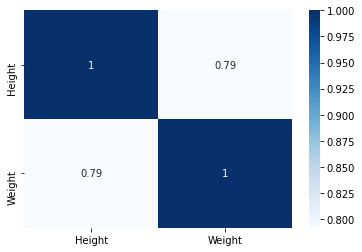

In [97]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Nivell 3

## Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

### Geometric mean

In [110]:
import numpy as np

def geometric_mean(x: list):
    a = np.log(x)
    return np.exp(a.mean())

print("Geometric Mean\n")
print("Height: ",geometric_mean(df.Height))
print("Weight: ",geometric_mean(df.Weight))

Geometric Mean

Height:  175.18715180149678
Weight:  69.45882922525192


### Harmonic mean

In [111]:
def harmonic_mean(x: list):

    return len(x) / np.sum(1.0/x)

print("Harmonic Mean\n")
print("Height: ",harmonic_mean(df.Height))
print("Weight: ",harmonic_mean(df.Weight))

Harmonic Mean

Height:  174.87404398100165
Weight:  68.10542740105656
